In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
# Add command to download data if not already present

In [30]:
# data from https://www.kaggle.com/c/cs-506-midterm-a1-b1/data?select=train.csv
df = pd.read_csv('~/Downloads/train.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Id                      int64  
 1   ProductId               object 
 2   UserId                  object 
 3   HelpfulnessNumerator    int64  
 4   HelpfulnessDenominator  int64  
 5   Score                   float64
 6   Time                    int64  
 7   Summary                 object 
 8   Text                    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 116.6+ MB


In [32]:
df['ProductId'].unique().shape

(50052,)

In [33]:
df['UserId'].unique().shape

(123960,)

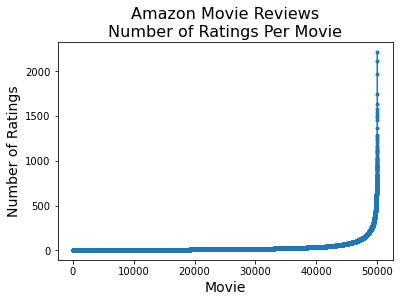

In [42]:
plt.plot(sorted(df.groupby('ProductId').count()['Id'].values), '.-')
plt.ylabel('Number of Ratings', fontsize = 14)
plt.xlabel('Movie', fontsize = 14)
plt.title(f'Amazon Movie Reviews\nNumber of Ratings Per Movie', fontsize = 16)
plt.savefig('skewed-review-dist.png');

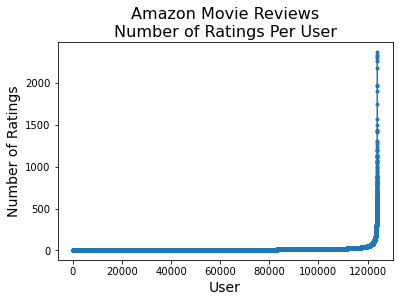

In [74]:
plt.plot(sorted(df.groupby('UserId').count()['Id'].values), '.-')
plt.ylabel('Number of Ratings', fontsize = 14)
plt.xlabel('User', fontsize = 14)
plt.title(f'Amazon Movie Reviews\nNumber of Ratings Per User', fontsize = 16)
plt.savefig('skewed-review-dist-user.png');

J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW, 2013

### Choose the densest columns and rows of the recommendation matrix

#### Columns

In [85]:
pids = df.groupby('ProductId').count()['Id']
hipids = pids[pids > 50].index

In [86]:
hipidrec = [r in hipids for r in df['ProductId']]

#### Rows

In [87]:
uids = df.groupby('UserId').count()['Id']
hiuids = uids[uids > 50].index

In [88]:
hiuidrec = [r in hiuids for r in df['UserId']]

#### Create Matrix

In [114]:
goodrec = [a and b for a, b in zip(hiuidrec, hipidrec)]
good_df = df.loc[goodrec]

In [115]:
R = good_df.pivot_table(columns = 'ProductId', index = 'UserId', values = 'Score')

In [116]:
R

ProductId,0005019281,0005119367,0307142485,0307142493,0307514161,0310263662,0310274281,0718000315,0764001035,0764003828,...,B00IKM5OCO,B00IWULQQ2,B00J4LMHMK,B00J5JSV1W,B00JA3RPAG,B00JAQJMJ0,B00JBBJJ24,B00JKPHUE0,B00K2CHVJ4,B00L4IDS4W
UserId,,,,,,,,,,,,,,,,,,,,,
A02755422E9NI29TCQ5W3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100JCBNALJFAW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10175AMUHOQC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103KNDW8GN92L,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZUBX0AYYNTFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXGPM8EKSHE9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXHK8IO25FL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
R.to_csv('amazon-recs-dense-submatrix.csv')

#### Start here to avoid using original large dataset

In [123]:
R = pd.read_csv('amazon-recs-dense-submatrix.csv', index_col = 'UserId')

In [124]:
R

,0005019281,0005119367,0307142485,0307142493,0307514161,0310263662,0310274281,0718000315,0764001035,0764003828,...,B00IKM5OCO,B00IWULQQ2,B00J4LMHMK,B00J5JSV1W,B00JA3RPAG,B00JAQJMJ0,B00JBBJJ24,B00JKPHUE0,B00K2CHVJ4,B00L4IDS4W
UserId,,,,,,,,,,,,,,,,,,,,,
A02755422E9NI29TCQ5W3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100JCBNALJFAW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10175AMUHOQC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103KNDW8GN92L,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZUBX0AYYNTFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXGPM8EKSHE9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXHK8IO25FL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
from importlib import reload
import MF as MF

In [128]:
RS = MF.als_MF(20, 1)

In [130]:
%time pred, error = RS.fit_model(R)

CPU times: user 5min 20s, sys: 34.9 s, total: 5min 55s
Wall time: 1min 34s


In [131]:
print(f'RMSE: {np.sqrt(error/R.count().sum())}')

RMSE: 0.3422944553507611


In [133]:
known = R.count().sum() / (1.0*R.size)
print(known)

0.00987536204504939


In [135]:
R

,0005019281,0005119367,0307142485,0307142493,0307514161,0310263662,0310274281,0718000315,0764001035,0764003828,...,B00IKM5OCO,B00IWULQQ2,B00J4LMHMK,B00J5JSV1W,B00JA3RPAG,B00JAQJMJ0,B00JBBJJ24,B00JKPHUE0,B00K2CHVJ4,B00L4IDS4W
UserId,,,,,,,,,,,,,,,,,,,,,
A02755422E9NI29TCQ5W3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100JCBNALJFAW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10175AMUHOQC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103KNDW8GN92L,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZUBX0AYYNTFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXGPM8EKSHE9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXHK8IO25FL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
RSL = MF.lmafit_MF(20)

In [137]:
%time pred, error = RSL.fit_model(R)

CPU times: user 3min 44s, sys: 23 s, total: 4min 7s
Wall time: 1min 3s


In [138]:
print(f'RMSE: {np.sqrt(error/R.count().sum())}')

RMSE: 0.4211395526815545


In [145]:
RN = ~R.isnull()
visible = np.where(RN)

In [150]:
import sklearn.model_selection as model_selection

In [168]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(visible[0], visible[1], test_size = 0.1)

In [176]:
R.iloc(zip(X_test, Y_test))

ValueError: No axis named <zip object at 0x7fde50cd6320> for object type DataFrame

In [170]:
X_test.shape

(26305,)

In [171]:
R.shape

(3677, 7244)

In [172]:
visible[0].shape

(263042,)